In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import fftpack
from scipy.integrate import odeint
from matplotlib.colors import LogNorm
from matplotlib.ticker import  MultipleLocator

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

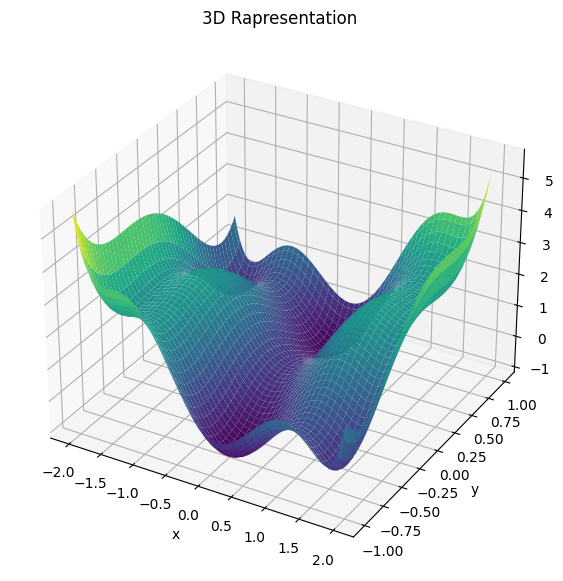

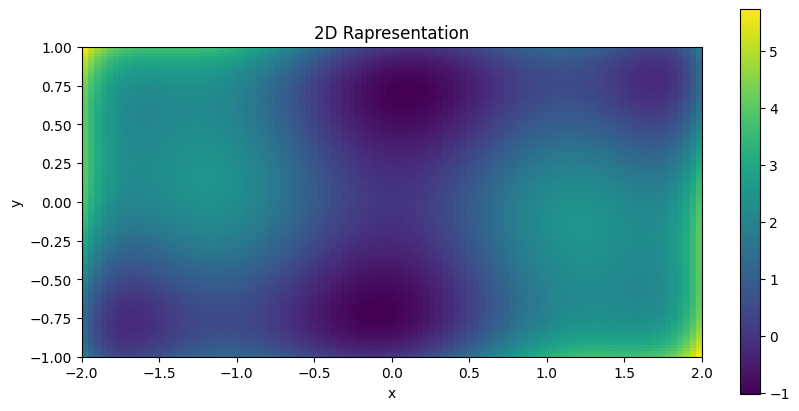


 Global minima and function value at those points:
(xmin1,ymin1) = [-0.08984198  0.71265633] , f(xmin1,ymin1) = -1.0316284534898341
(xmin2,ymin2) = [ 0.08984197 -0.71265635] , f(xmin2,ymin2) = -1.0316284534898448

 What happens for an initial guess of (x,y)=(0,0) ?
(xmin3,ymin3) = [0. 0.] , f(xmin3,ymin3) = 0.0


In [2]:
def f(x,y):
    return (4-2.1*x**2 + (x**4)/3)*x**2 + x*y + (4*y**2 - 4)*y**2

def ff(x):
    return (4-2.1*x[0]**2 + (x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

#Variables can be restricted to  −2<𝑥<2 and  −1<𝑦<1
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

#Use numpy.meshgrid() and plt.imshow() to find visually the regions
xx, yy = np.meshgrid(x, y)
z = f(xx, yy)

#3d
fig3d = plt.figure(figsize=(7,7))
td = plt.axes(projection = '3d')
td.plot_surface(xx, yy, z,  cmap='viridis')
td.set_title('3D Rapresentation')
td.set_xlabel('x')
td.set_ylabel('y')
td.set_zlabel('z')
plt.show()

#2d
fig2d = plt.figure(figsize=(10,5))
plt.title('2D Rapresentation')
plt.xlabel('x')
plt.ylabel('y')

plt.imshow(z, extent=[-2,2,-1,1])
plt.colorbar()
plt.show()


print('\n Global minima and function value at those points:')

#Use scipy.optimize.minimize(), optionally trying its optional arguments.
sol1 = optimize.minimize(ff, x0 = (-1,-1))
print('(xmin1,ymin1) =', sol1['x'],', f(xmin1,ymin1) =',sol1['fun'])
sol2 = optimize.minimize(ff, x0 = (1,1))
print('(xmin2,ymin2) =', sol2['x'],', f(xmin2,ymin2) =',sol2['fun'])


#What happens for an initial guess of (x,y)=(0,0) ?
print('\n What happens for an initial guess of (x,y)=(0,0) ?')
sol0 = optimize.minimize(ff, x0 = (0,0))
print('(xmin3,ymin3) =', sol0['x'],', f(xmin3,ymin3) =',sol0['fun']) #we find a local minimum


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

Text(0.5, 1.0, 'Damped pendulum, omega(t) ')

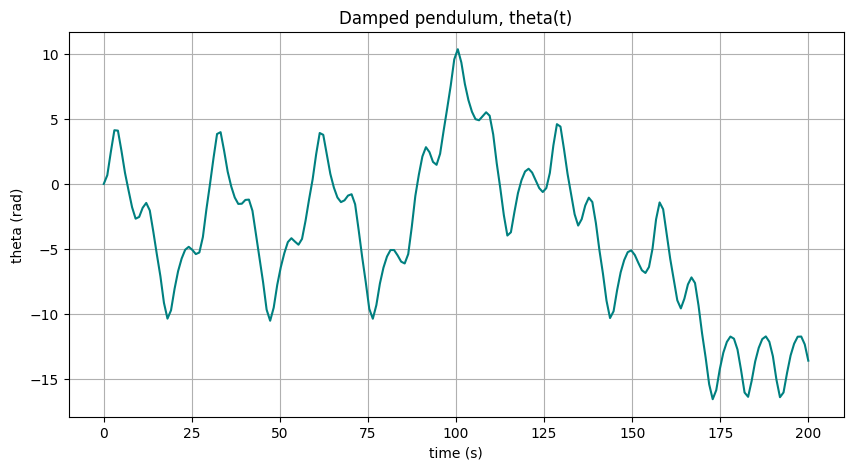

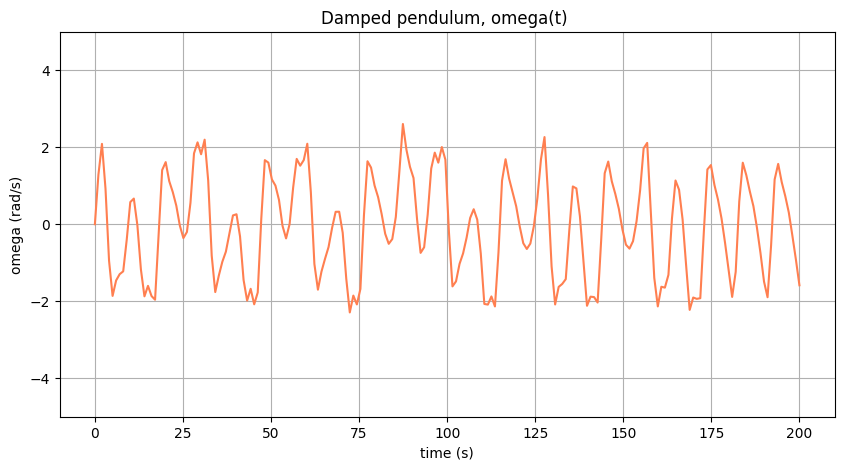

In [11]:
# set the constants
Q = 2.0
d = 1.5
OMEGA = 0.65

#initial conditions
theta0 = 0
omega0 = 0
init = [theta0, omega0]

#time vector
t = np.linspace(0, 200, 200)

#solve the ODE
def derivative(y, t, Q, d, OMEGA):
    theta, omega = y
    return [omega, -1/Q * omega + np.sin(theta) + d * np.cos(OMEGA*t)]

sol = odeint(derivative, init, t, args=(Q, d, OMEGA) )

#Plot the solutions
fig = plt.figure(figsize = (10,5))
plt.plot(t, sol[:,0], 'teal', label='theta(t)')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('theta (rad)')
plt.title('Damped pendulum, theta(t)')


fig = plt.figure(figsize = (10,5))
plt.plot(t, sol[:,1], 'coral', label='omega(t)')
plt.grid()
plt.ylim((-5,5))
plt.xlabel('time (s)')
plt.ylabel('omega (rad/s)')
plt.title('Damped pendulum, omega(t) ')


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

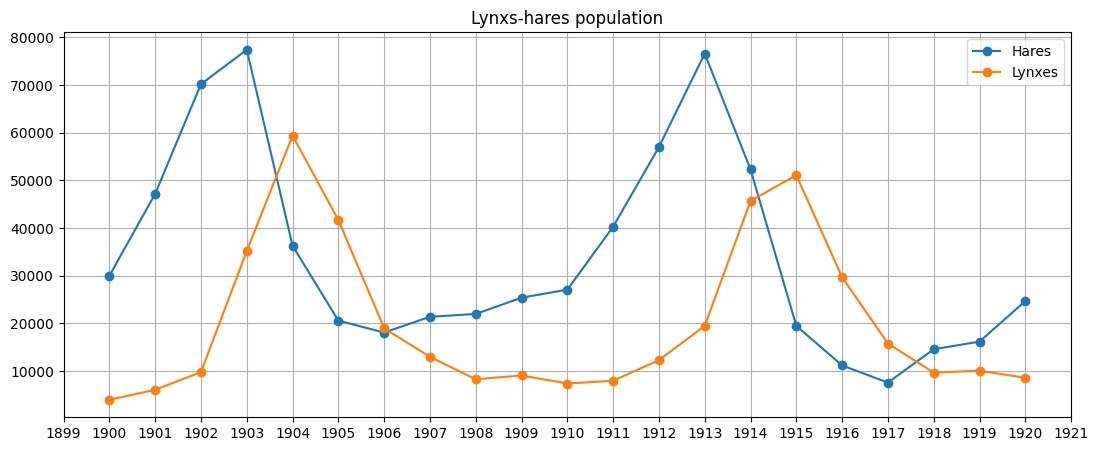

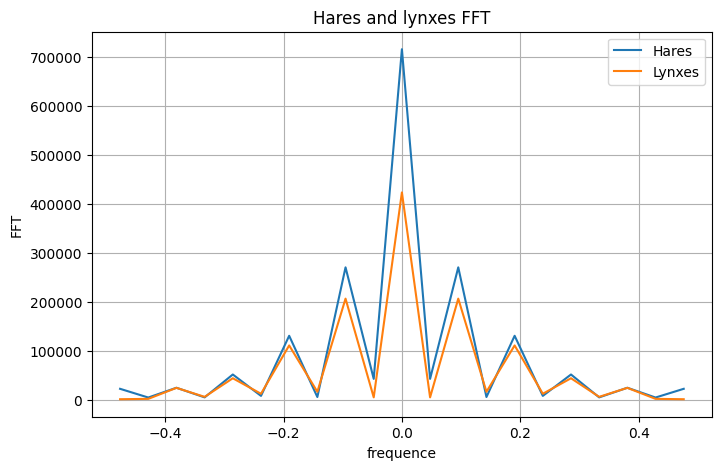

Hares peak frequency: 0.09523809523809523
Lynxes peak frequency: 0.09523809523809523
Hares period: 10.5
Lynxes period: 10.5


In [4]:
data = np.loadtxt('./populations.txt')
year, hares, lynxes, carrots = data.T

#Plot the data
fig = plt.figure(figsize=(13,5))
plt.plot(year, hares, 'o-', label='Hares')
plt.plot(year, lynxes, 'o-', label='Lynxes')
plt.grid()
plt.legend()
ax =fig.axes[0]
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.title('Lynxs-hares population')
plt.show()

#Analise hares and lynxes
hares_fft = fftpack.fftshift(fftpack.fft(hares))
hares_freq = fftpack.fftshift(fftpack.fftfreq(len(hares_fft),1))

lynxes_fft = fftpack.fftshift(fftpack.fft(lynxes))
lynxes_freq = fftpack.fftshift(fftpack.fftfreq(len(lynxes_fft),1))


#Plot FFT
fig1 = plt.figure(figsize=(8,5))
plt.plot(hares_freq, abs(hares_fft),label='Hares')
plt.plot(lynxes_freq, abs(lynxes_fft),label='Lynxes')
plt.title('Hares and lynxes FFT')
plt.xlabel('frequence')
plt.ylabel('FFT') 
plt.legend()
plt.grid()
plt.show()


pos_mask = np.where(hares_freq > 0) 

hfreqs = hares_freq[pos_mask]
hpower = np.abs(hares_fft)
hpowes = hpower[pos_mask]

lfreqs = lynxes_freq[pos_mask]
lpower = np.abs(lynxes_fft)
lpowes = lpower[pos_mask]

# find the max of freqs array
peak_freq_h = hfreqs[hpowes.argmax()] 
peak_freq_l = lfreqs[lpowes.argmax()]

print('Hares peak frequency:', peak_freq_h)
print('Lynxes peak frequency:', peak_freq_l)
hperiod = 1/peak_freq_h
lperiod = 1/peak_freq_l
print('Hares period:', hperiod)
print('Lynxes period:', lperiod)



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image')

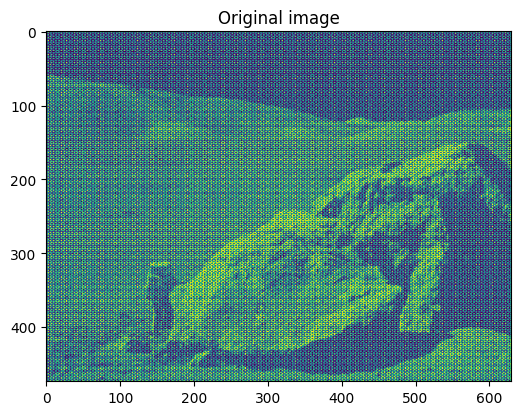

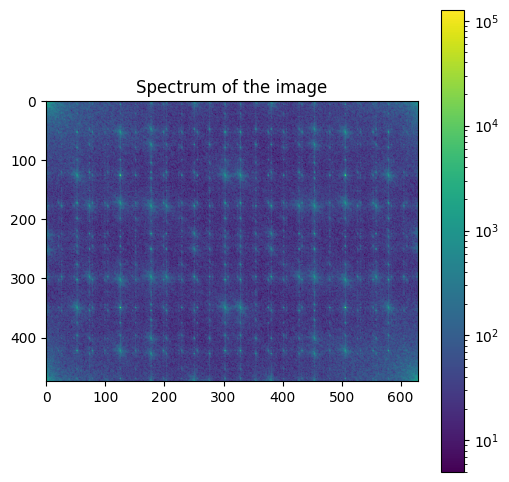

<Figure size 600x600 with 0 Axes>

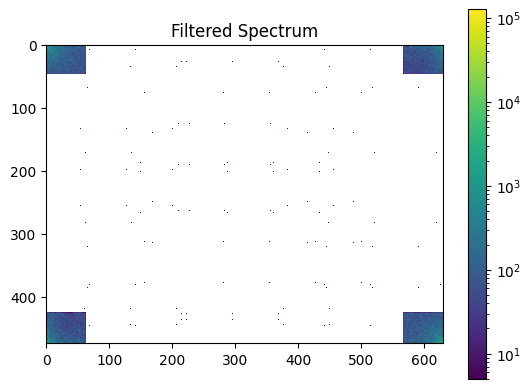

<Figure size 600x600 with 0 Axes>

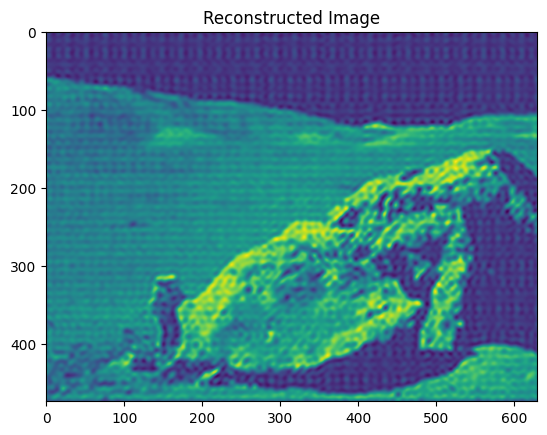

In [5]:
#Import the image as a 2D numpy array and examine the image
fig1 = plt.figure(figsize=(6,6))
im = plt.imread('moonlanding.png')

plt.imshow(im)
plt.title('Original image')

#Performs a 2D FFT
fig2 = plt.figure(figsize=(6,6))
imf = fftpack.fft2(im)
# Plot the spectrum of the image.
plt.imshow(np.abs(imf), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Spectrum of the image')


imf2 = imf.copy()
r, c = imf2.shape
keep_fraction = 0.1
imf2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
imf2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

fig3 = plt.figure(figsize=(6,6))
plt.figure()
plt.imshow(np.abs(imf2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(imf2)
im_new = np.real(im_new)

fig4 = plt.figure(figsize=(6,6))
plt.figure()
plt.imshow(im_new)
plt.title('Reconstructed Image')